<a href="https://colab.research.google.com/github/Hackathorn/CVA-SBERT/blob/main/QA_LS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of QA-Unicorn-Embeddings

ref: https://www.udemy.com/course/openai-python-api-bootcamp-learn-to-use-ai-gpt3-and-more/

## Imports

In [2]:
# !rm --help
!rm /content/sample_data -r
!rm /content/drive -r

^C


In [1]:
import pandas as pd
import numpy as np

# load pre-calculated zeta embeddings using Unicorn Startups

In [2]:
# retrieve zeta array from GitHub repo      ######## DOES NOT WORK -- UPLOAD FROM LOCAL REPO
!wget 'https://github.com/Hackathorn/Udemy-JP-OpenAI-API-Bootcamp/blob/78d04cc3c643a1c50555154cf3ab3a515691b72c/09-Text-Embedding/zeta.npy'

--2023-04-23 21:57:32--  https://github.com/Hackathorn/Udemy-JP-OpenAI-API-Bootcamp/blob/78d04cc3c643a1c50555154cf3ab3a515691b72c/09-Text-Embedding/zeta.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘zeta.npy’

zeta.npy                [ <=>                ] 137.29K  --.-KB/s    in 0.04s   

2023-04-23 21:57:32 (3.54 MB/s) - ‘zeta.npy’ saved [140583]



In [4]:
with open('zeta.npy', 'rb') as f:
    zeta = np.load(f, allow_pickle=True)

## Various analysis plots using ChatGPT

Heatmap: A heatmap can be used to visualize the values of zeta as a color map, where the x-axis and y-axis represent the dimensions D and N respectively. This will help in identifying patterns and correlations between the values of the array.

<Axes: >

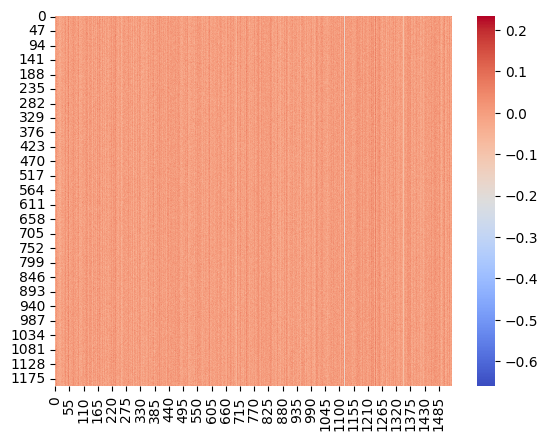

In [11]:
import seaborn as sns
import numpy as np

sns.heatmap(zeta, cmap='coolwarm')

Jointplot: A jointplot can be used to plot the distribution of values along both axes of the array. This plot will display a scatter plot of the data points with the marginal distributions along both the x-axis and y-axis.

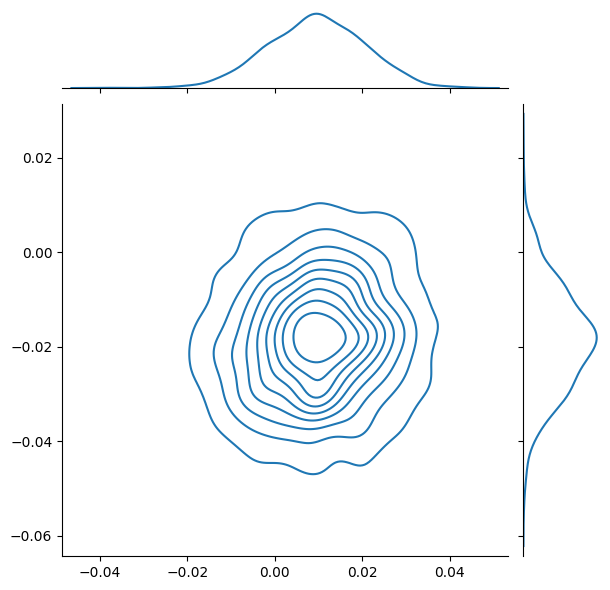

In [12]:
sns.jointplot(x=zeta[:,0], y=zeta[:,1], kind='kde')

Pairplot: A pairplot can be used to plot pairwise relationships between different dimensions of the array. This plot will display scatter plots of each pair of dimensions along with the corresponding marginal distributions.

In [ ]:
sns.pairplot(pd.DataFrame(zeta))

To show a heatmap of correlations among the second axis (columns) across all rows in a numpy array zeta using Seaborn, you can use the sns.heatmap() function. 

We first compute the correlation matrix for the columns of zeta using the np.corrcoef() function with the rowvar=False argument to specify that the columns are to be treated as variables.

Then, we plot the heatmap of correlations using the sns.heatmap() function with the annot=True argument to display the correlation coefficients on the heatmap. The cmap='coolwarm' argument sets the color map for the heatmap.

This heatmap will display the correlations among the columns (second axis) of zeta across all rows. The diagonal of the heatmap will show the correlation of each column with itself, which will always be 1.

In [ ]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix for columns
corr = np.corrcoef(zeta, rowvar=False)

# Plot the heatmap of correlations
sns.heatmap(corr, cmap='coolwarm', annot=True)

Use the PCA class from the sklearn.decomposition module.

We first create a PCA object and fit it to the data using the fit() method. This computes the principal components and the explained variance ratio of the data.

We then use the components_ attribute to get the principal components, which will be a numpy array of shape (n_components, n_features), where n_components is the number of principal components and n_features is the number of features in the original data.

We also use the explained_variance_ratio_ attribute to get the explained variance ratio of each principal component. This is a numpy array of shape (n_components,), where each element represents the proportion of variance explained by the corresponding principal component.

Note that by default, the n_components parameter of the PCA class is set to the minimum of the number of rows and columns of the input data. This means that the number of principal components will be equal to the number of features in the original data. However, you can set this parameter to a lower value to reduce the dimensionality of the data.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Generate a sample numpy array
zeta = np.random.rand(10, 5)

# Create a PCA object
pca = PCA()

# Fit the PCA model to the data
pca.fit(zeta)

# Get the principal components
pcs = pca.components_

# Get the explained variance ratio
evr = pca.explained_variance_ratio_

# Print the results
print("Principal components:")
print(pcs)
print("Explained variance ratio:")
print(evr)

To visualize the results of a principal component analysis (PCA) on a numpy array zeta, you can plot the principal components against each other using a scatter plot. Here's an example code snippet that shows how to visualize the PCA results using Seaborn:

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate a sample numpy array
zeta = np.random.rand(10, 5)

# Create a PCA object
pca = PCA()

# Fit the PCA model to the data
pca.fit(zeta)

# Get the principal components
pcs = pca.transform(zeta)

# Create a scatter plot of the first two principal components
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1])

# Add axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

In the above code, we first create a PCA object and fit it to the data using the fit() method. We then use the transform() method to transform the data into the principal component space. This returns a numpy array of shape (n_samples, n_components), where n_samples is the number of samples in the original data and n_components is the number of principal components.

We then create a scatter plot of the first two principal components using the sns.scatterplot() function. The x and y arguments specify the first and second principal components, respectively.

Finally, we add axis labels to the plot using the plt.xlabel() and plt.ylabel() functions, and show the plot using the plt.show() function.

Note that this is just one way to visualize the PCA results. Depending on the specific problem and the number of principal components, you may want to use different visualization techniques such as biplots, 3D scatter plots, or heatmaps.